In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
ri = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/police/police.csv")


In [ ]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# 1. Line Plot

In [ ]:
ri.stop_date = pd.to_datetime(ri.stop_date)

In [ ]:
ri["year"] = ri.stop_date.dt.year
vil_counts_by_year = ri.year.value_counts(normalize=True).sort_index()

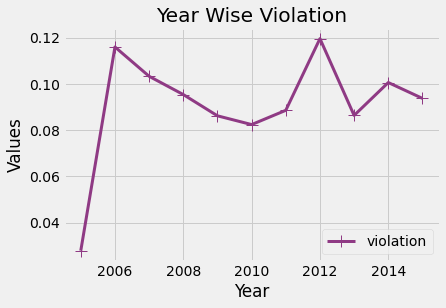

In [ ]:
plt.plot(vil_counts_by_year.index, vil_counts_by_year.values, 
         color='#8f3a84', marker='+', linestyle='solid', 
         markersize=12, linewidth=3, label="violation")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.title("Year Wise Violation")
plt.show()

# 2. Box Plot

In [ ]:
driver_age_not_null_data = ri.loc[ri.driver_age.notnull()].driver_age.unique().tolist()

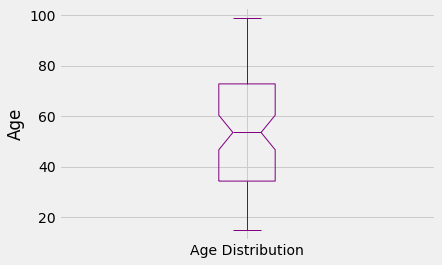

In [ ]:
data = [driver_age_not_null_data]
box = plt.boxplot(x=data, notch=True, labels=["Age Distribution"])

c2 = 'purple'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box[item], color=c2)

plt.setp(box["fliers"], markeredgecolor=c2)
plt.ylabel("Age")
plt.show()

# 3. Bar Plot

In [ ]:
vil_counts_by_year = ri.year.value_counts(normalize=True).sort_index()

In [ ]:
vil_counts_by_year

2005    0.027883
2006    0.115968
2007    0.103291
2008    0.095399
2009    0.086199
2010    0.082417
2011    0.088575
2012    0.119576
2013    0.086374
2014    0.100588
2015    0.093731
Name: year, dtype: float64

In [ ]:
color = []
for year in vil_counts_by_year.index:
  if year == 2005:
    color.append('#5d4037')
  elif year == 2012:
    color.append('#880e4f')
  else:
    color.append('#90a4ae')

No handles with labels found to put in legend.


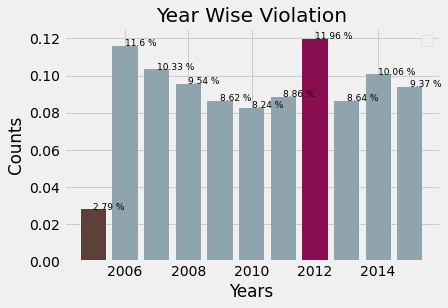

In [ ]:
plt.bar(
    x=vil_counts_by_year.index,
    height=vil_counts_by_year.values,
    color=color
)
for year,value in vil_counts_by_year.items():
    plt.text(x=year , y =value , s=f"{round(value*100, 2)} %" , fontdict=dict(fontsize=9))
plt.xlabel("Years")
plt.ylabel("Counts")
plt.title("Year Wise Violation")
plt.legend()
plt.show()

# 4. Scatter Plot

In [ ]:
age_vs_stop = ri[ri.driver_age.notnull()].driver_age.value_counts().sort_index()

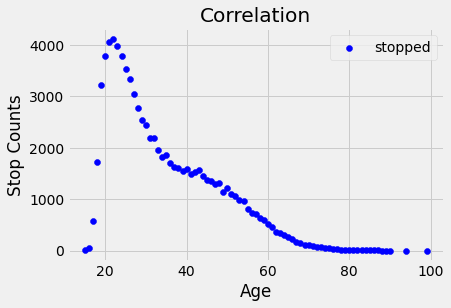

In [ ]:
plt.scatter(age_vs_stop.index.tolist(), age_vs_stop.values.tolist(), 
            c ="blue", label="stopped")
plt.title("Correlation")
plt.xlabel("Age")
plt.ylabel("Stop Counts")
plt.legend()
plt.show()

# 5. Stacked Area Plot

In [ ]:
ri.violation.unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [ ]:
years = ri.year.unique().tolist()
speeding_violation = ri[ri.violation=='Speeding'].groupby(ri.year).violation.value_counts()
speeding_violation_data = [speeding_violation.get(x, np.array([0])).tolist()[0]  for x in years] 
moving_violation = ri[ri.violation=='Moving violation'].groupby(ri.year).violation.value_counts()
moving_violation_data = [moving_violation.get(x, np.array([0])).tolist()[0] for x in years]
eqp_violation = ri[ri.violation=='Equipment'].groupby(ri.year).violation.value_counts()
eqp_violation_data = [eqp_violation.get(x, np.array([0])).tolist()[0] for x in years]


In [ ]:
print(years, speeding_violation_data, moving_violation_data, eqp_violation_data)

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] [1818, 7732, 6789, 5395, 3907, 3710, 3679, 4385, 3476, 4003, 3569] [384, 1299, 995, 1364, 1496, 1515, 1913, 3056, 1359, 1500, 1343] [170, 640, 594, 458, 698, 836, 1144, 2059, 1416, 1564, 1441]


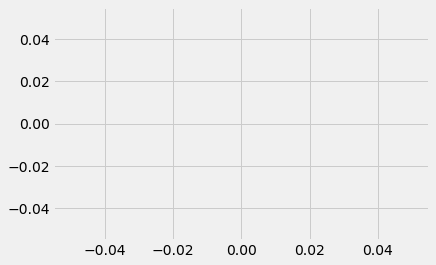

In [ ]:
plt.plot([], [], color='r', label = 'D 1')
plt.plot([], [], color='g', label = 'D 2')
plt.plot([], [], color='b', label = 'D 3')

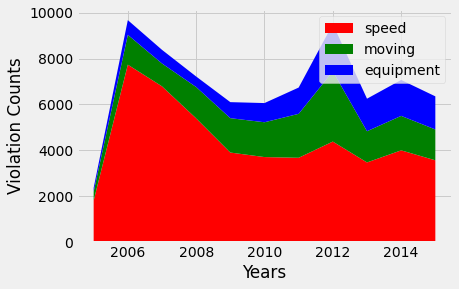

In [ ]:
plt.stackplot(years, speeding_violation_data, moving_violation_data, eqp_violation_data, labels=['speed', 'moving', 'equipment'], 
              colors=['r','g','b'])
plt.legend()
plt.xlabel("Years")
plt.ylabel("Violation Counts")
plt.show()

# 6. Pie Plot

In [ ]:
pie_data = ri.violation.value_counts(normalize=True)
print(pie_data)
pie_label = pie_data.index.tolist()
pie_value = pie_data.values.tolist()
print(pie_label, pie_value)

Speeding               0.560862
Moving violation       0.187760
Equipment              0.127534
Other                  0.049961
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64
['Speeding', 'Moving violation', 'Equipment', 'Other', 'Registration/plates', 'Seat belt'] [0.5608624201462827, 0.1877603925562448, 0.1275344875474493, 0.04996065179150079, 0.03971854457920563, 0.03416350337931673]


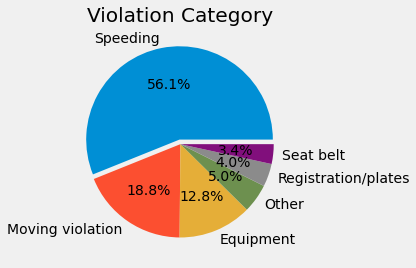

<Figure size 1800x360 with 0 Axes>

In [ ]:
plt.pie(x=pie_value, labels=pie_label, autopct='%1.1f%%', explode=(0.05, 0, 0, 0, 0, 0))
plt.title("Violation Category")
plt.figure(figsize=(25.0, 5.0))
plt.show()

# 7. Line Plot Fill Color

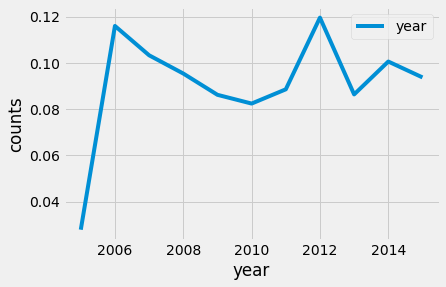

In [ ]:
d = ri.year.value_counts(normalize=True).sort_index()
d.plot(xlabel="year", ylabel="counts", legend=True)

In [ ]:
x = d.index.tolist()
y = d.values.tolist()

Text(0.5, 1.0, 'Violation with Years')

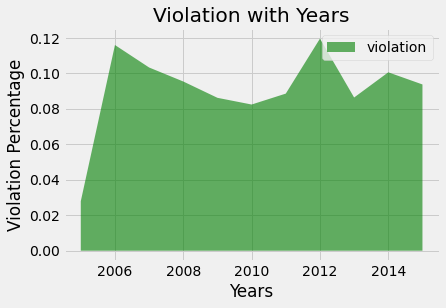

In [ ]:
plt.fill_between(x=x, y1=y,facecolor='g', alpha=0.6, label="violation")
plt.xlabel("Years")
plt.ylabel("Violation Percentage")
plt.legend()
plt.title("Violation with Years")

# 8. Histogram

In [ ]:
ri.driver_age_raw.values

array([1985., 1965., 1972., ..., 1992., 1993., 1959.])

In [ ]:
ri.loc[((ri.driver_age_raw == 8801) | (ri.driver_age_raw==2919) | (ri.driver_age_raw==0)),"driver_age_raw"] = np.nan

No handles with labels found to put in legend.


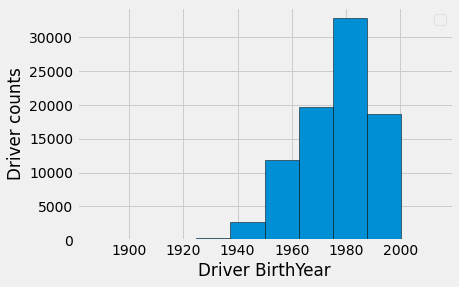

In [ ]:
plt.hist(x=ri.driver_age_raw.values, edgecolor='black')
plt.xlabel("Driver BirthYear")
plt.ylabel("Driver counts")
plt.legend()
plt.show()

# 9. Stacked Bar Plot

In [ ]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [ ]:
year = ri.year.unique()


In [ ]:
ri.violation.unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [ ]:
year_srs = ri[ri.violation=='Speeding'].year.value_counts(normalize=True).sort_index()
speeding_data = [ year_srs.get(x, 0) for x in year ]
print(speeding_data)

[0.03751315436518581, 0.15954439469285847, 0.14008625136702227, 0.11132203949404701, 0.08061820357798732, 0.07655324680684233, 0.0759135835585911, 0.09048139818005489, 0.07172482099746198, 0.08259909621773312, 0.07364381074221571]


In [ ]:
year_srs = ri[ri.violation=='Equipment'].year.value_counts(normalize=True).sort_index()
equipment_data = [ year_srs.get(x, 0) for x in year ]
print(equipment_data)

[0.015426497277676952, 0.05807622504537205, 0.05390199637023593, 0.04156079854809437, 0.0633393829401089, 0.07586206896551724, 0.10381125226860254, 0.1868421052631579, 0.12849364791288567, 0.14192377495462796, 0.1307622504537205]


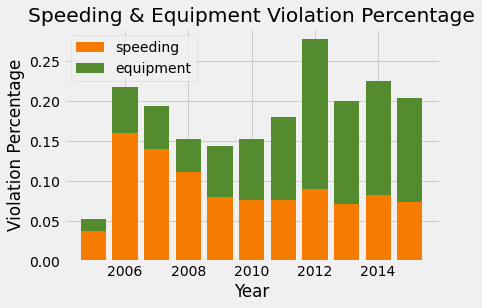

In [ ]:
plt.bar(year, speeding_data, color='#f57c00', label="speeding")
plt.bar(year, equipment_data, bottom=speeding_data, color='#558b2f', label="equipment")
plt.xlabel("Year")
plt.ylabel("Violation Percentage")
plt.title("Speeding & Equipment Violation Percentage")
plt.legend()
plt.show()

# 10. 3D Graph - Matplotlib

In [ ]:
from mpl_toolkits.mplot3d import axes3d

In [ ]:
year_srs = ri[ri.violation=='Seat belt'].year.value_counts(normalize=True).sort_index()
seat_belt_data = [ year_srs.get(x, 0) for x in year ]
print(seat_belt_data)

[0, 0, 0, 0, 0, 0, 0, 0.006775067750677507, 0.22899728997289973, 0.4092140921409214, 0.35501355013550134]


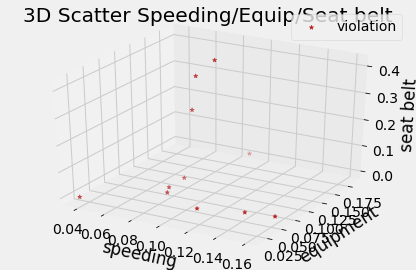

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(speeding_data, equipment_data, seat_belt_data, c='#b71c1c', marker='*', 
           label='violation')

ax.set_xlabel('speeding')
ax.set_ylabel('equipment')
ax.set_zlabel('seat belt')
plt.title("3D Scatter Speeding/Equip/Seat belt")
plt.legend()
plt.tight_layout()
plt.show()